# Inferring A Fluorescence Calibration Factor 

(c) The authors. This work is licensed under the standard [CC-BY 4.0]() and all code herin is licensed under the standard [MIT]() permissive license.

---

In [20]:
import sys
import numpy as np
import pystan
import pandas as pd
import altair as alt
import bokeh.io
import bokeh.plotting
sys.path.insert(0, '../../')
import mwc.bayes
import mwc.stats

In this notebook, we infer the most-likely value for the calibration factor between fluorescence and protein copy number across a set of experiments.

## Derivation

## Inferential Model

## Implementation

In [12]:
# Load the fluctuation data. 
fluct_data = pd.read_csv('../../data/compiled_fluctuations.csv')

# Load the fold-change measurements 
fc_data = pd.read_csv('../../data/compiled_fold_change.csv')

# Add identifiers to the fluctuation data. 
idx = 1
for g, d in fluct_data.groupby(['carbon', 'date', 'run_no']):
    fluct_data.loc[(fluct_data['carbon']== g[0]) & (fluct_data['date']==g[1]) &
                  (fluct_data['run_no']==g[2]), 'idx'] = idx
    idx += 1

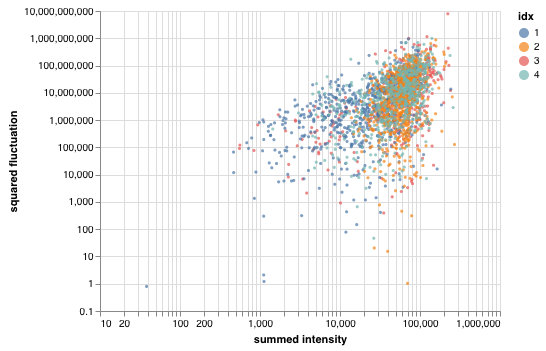

In [21]:
alt.Chart(fluct_data).mark_point(filled=True, size=10).encode(
    x=alt.X('summed:Q', scale={'type':'log', 'zero':False}, axis={'title': 'summed intensity'}),
    y=alt.Y('fluct:Q', scale={'type':'log', 'zero':False}, axis={'title': 'squared fluctuation'}),
    color='idx:N').interactive()

In [30]:
# Load the Stan model. 
model = mwc.bayes.loadStanModel('../stan/Hierarchical_calibration_factor.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_15bdbbaa912a55a7381dde02f8200f05 NOW.


Precompiled model not found. Compiling model...
finished!


In [ ]:
# Assemble the sampling data dictionary. 
data_dict = dict(J_media=1, J_run=len(fluct_data['idx'].unique()), N=len(fluct_data),
                media_idx=np.ones(len(fluct_data)).astype(int), run_idx=fluct_data['idx'].values.astype(int),
                I_1=fluct_data['I_1'], I_2=fluct_data['I_2'])

# Sample!
samples = model.sampling(data_dict, iter=5000, chains=4)

{'J_media': 1,
 'J_run': 4,
 'N': 2359,
 'media_idx': array([1., 1., 1., ..., 1., 1., 1.]),
 'run_idx': array([3, 3, 3, ..., 4, 4, 4]),
 'I_1': 0        56640.551525
 1         2907.216944
 2        18105.115118
 3         3003.470477
 4        18077.995418
 5        63199.967154
 6        19202.382783
 7        31444.002064
 8        23672.597663
 9        32931.604309
 10       97853.756016
 11       88871.811704
 12       44348.985029
 13       46857.019938
 14       48817.107632
 15      119831.202812
 16       37185.593920
 17       47300.618441
 18       45401.646705
 19       59943.164160
 20       49561.417693
 21       27684.784280
 22       27492.277214
 23       12563.449699
 24       15086.999160
 25       37045.569400
 26       39090.953022
 27        5707.999160
 28       47900.857842
 29       72607.762663
             ...      
 2329     24951.456094
 2330     17803.267530
 2331     18190.699117
 2332     16962.496258
 2333     20826.577946
 2334     22888.834583
 2335 